# Figure 1: Galaxy Main Sequence

This notebook generates Figure 1 showing the stellar mass vs star formation rate relationships for different galaxy simulations.

The figure includes:
1. Individual simulation panels showing the main sequence
2. Combined view with all simulations  
3. Zoom simulations overlaid on the main sequence

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
import os
import pickle

# Add src to path
sys.path.append('../src')

from utils.analysis import (sim_name, zoom_name, 
                           colors, zoom_colors, zoom_markers)
from utils.plotting import draw_grid_A

from matplotlib import rc # for text in plots to take Latex font
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Define axis labels without LaTeX
SM_axis_label = r'$M_*$ [$M_{\odot}$]'
SFR_axis_label = r'${\rm SFR}$ [$M_{\odot}$/yr]'

%matplotlib inline

## Load Processed Data

In [2]:
# Load simulation data
with open('../data/sim_data_raw.pkl', 'rb') as f:
    sim_data = pickle.load(f)

# Load zoom simulation data  
with open('../data/zoom_data_raw.pkl', 'rb') as f:
    zoom_data = pickle.load(f)

print("Loaded simulation data:")
for sim in sim_name:
    if sim_data[sim] is not None:
        print(f"{sim:>15s}: {sim_data[sim]['ngal']:>8,d} galaxies")

print("\nLoaded zoom simulation data:")  
for zoom in zoom_name:
    if zoom_data[zoom] is not None:
        print(f"{zoom:>15s}: {zoom_data[zoom]['ngal']:>8,d} galaxies")

Loaded simulation data:
          EAGLE:   16,710 galaxies
      Illustris:   19,354 galaxies
   IllustrisTNG:   12,220 galaxies
         Mufasa:    4,574 galaxies
          Simba:    4,938 galaxies
         SC-SAM:   18,722 galaxies
UniverseMachine:   75,696 galaxies

Loaded zoom simulation data:
         FIRE-2:       22 galaxies
            g14:        8 galaxies
      Marvel_JL:        5 galaxies


## Generate Figure 1: Galaxy Main Sequence

Plot limits: SM [7.8e+07, 3.7e+12], SFR [7.1e-03, 7.9e+01]


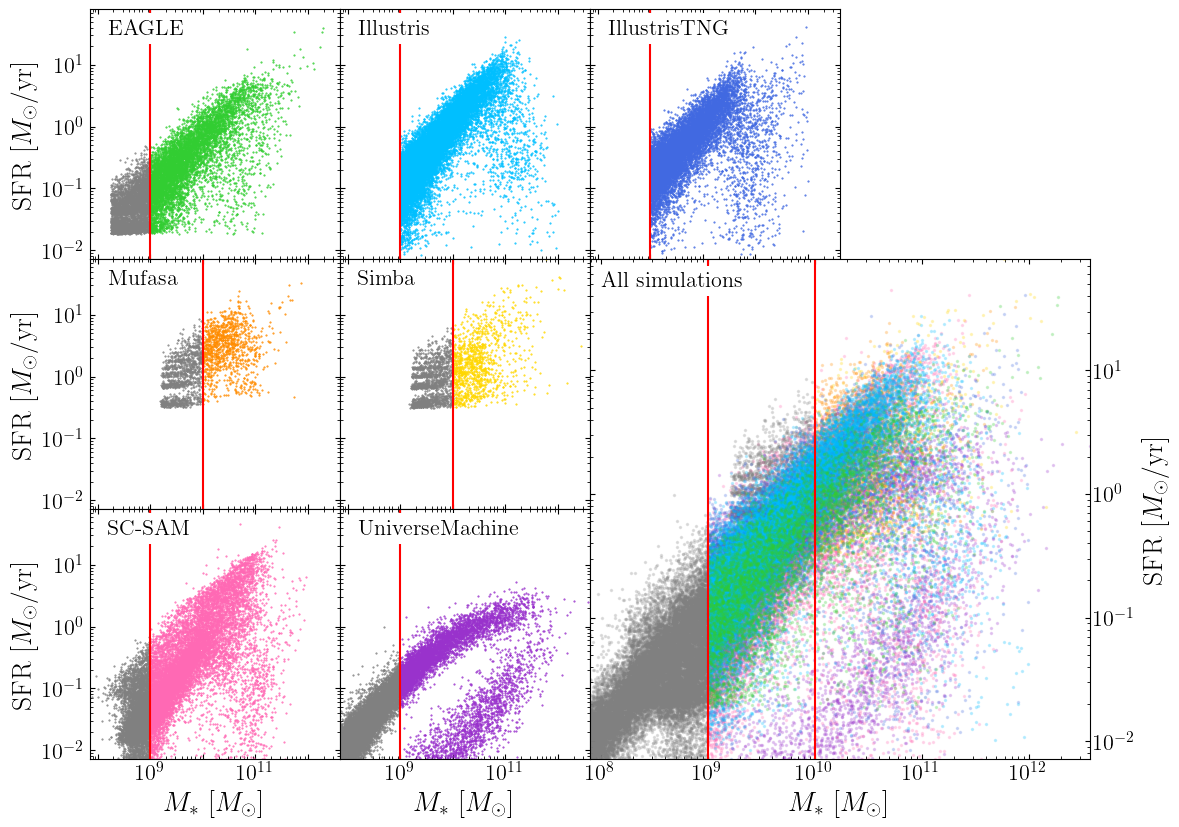

Figure 1A (main simulation panels) generated successfully!


In [3]:
# Calculate plot limits
minsm  = np.min([np.min(sim_data[sim]['sm']) for sim in sim_name[:-1] if sim_data[sim] is not None])  # exclude UM
maxsm  = np.max([np.max(sim_data[sim]['sm']) for sim in sim_name if sim_data[sim] is not None])
minsfr = np.min([np.min(sim_data[sim]['sfh_raw'].T[-1][sim_data[sim]['sfh_raw'].T[-1] > 0.]) 
                 for sim in sim_name[:-2] if sim_data[sim] is not None])  # ignore 0s, UM, SC
maxsfr = np.max([np.max(sim_data[sim]['sfh_raw'].T[-1]) for sim in sim_name if sim_data[sim] is not None])

print(f"Plot limits: SM [{minsm:.1e}, {maxsm:.1e}], SFR [{minsfr:.1e}, {maxsfr:.1e}]")

# Create the multi-panel figure
ax = draw_grid_A(xlabel=SM_axis_label, ylabel=SFR_axis_label, 
                 xlim=[minsm, maxsm], ylim=[minsfr, maxsfr])

# Plot each simulation
for sim in sim_name[::-1]:
    if sim_data[sim] is None:
        continue
        
    # Get stellar mass and current SFR (z=0)
    sm = sim_data[sim]['sm']
    sfr = sim_data[sim]['sfh_raw'].T[-1]  # Last time bin
    
    # Apply mass cuts
    if (sim == 'Mufasa') | (sim == 'Simba'):
        v = 1e10
    else:
        v = 1e9
    mask = sm <= v

    c = colors[sim]
    
    # Plot in individual panel
    ax[sim].loglog(sm[mask], sfr[mask], '.', c='grey', ms=1)
    ax[sim].loglog(sm[~mask], sfr[~mask], '.', c=c, ms=1)
    ax[sim].axvline(v, c='r')
    ax[sim].text(10**8.2, 10**1.5, sim, fontsize=16, 
                bbox=dict(facecolor='white', edgecolor='white', linewidth=0))

    # Custom ticks
    ax[sim].set_xticks([1e8,1e9,1e10,1e11,1e12], labels=["","$10^9$","","$10^{11}$",""])
    ax[sim].set_xticks([7e7,8e7,9e7,
                        2e8,3e8,4e8,5e8,6e8,7e8,9e8,
                        2e9,3e9,4e9,5e9,6e9,7e9,9e9,
                        2e10,3e10,4e10,5e10,6e10,7e10,9e10,
                        2e11,3e11,4e11,5e11,6e11,7e11,9e11,
                        2e12,3e12,4e12], minor=True)

    # Plot in combined panel
    ax['large'].loglog(sm[mask], sfr[mask], '.', c='grey', ms=3, alpha=0.2)
    ax['large'].loglog(sm[~mask], sfr[~mask], '.', c=c, ms=3, alpha=0.2)

# Add mass cut lines to combined panel
ax['large'].axvline(1e9, c='r')
ax['large'].axvline(1e10, c='r')
ax['large'].text(10**8, 10**1.68, 'All simulations', fontsize=16, 
                bbox=dict(facecolor='white', edgecolor='white', linewidth=0))

# Save figure to figures directory
os.makedirs('../figures', exist_ok=True)
plt.savefig('../figures/SFMS.png', bbox_inches='tight', dpi=300)
plt.savefig('../figures/SFMS.pdf', bbox_inches='tight')

plt.show()

print("Figure 1A (main simulation panels) generated successfully!")

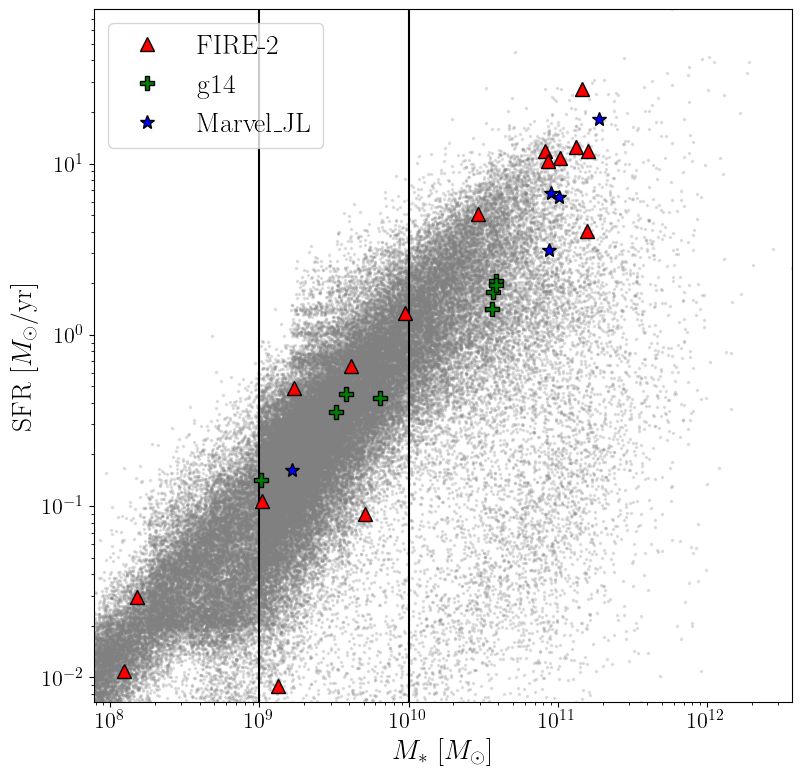

Figure 1B (zoom simulations overlay) generated successfully!


In [4]:
# Create zoom simulation overlay plot (Figure 1B)
plt.figure(figsize=(9,9))

# Plot main simulations in background
for sim in sim_name:
    if sim_data[sim] is None:
        continue
    sm = sim_data[sim]['sm']
    sfr = sim_data[sim]['sfh_raw'].T[-1]
    plt.loglog(sm, sfr, '.', c='grey', ms=3, alpha=0.2)

# Add mass cut lines
plt.axvline(1e9, c='k')
plt.axvline(1e10, c='k')

# Plot zoom simulations on top
for zoom in zoom_name:
    if zoom_data[zoom] is None:
        continue
    sm = zoom_data[zoom]['sm']
    sfr = zoom_data[zoom]['sfh_raw'].T[-1]
    plt.loglog(sm, sfr, ls='', marker=zoom_markers[zoom], c=zoom_colors[zoom], 
               mec='k', ms=10, label=zoom)

# Set limits and labels
plt.xlim(minsm, maxsm)
plt.ylim(minsfr, maxsfr)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel(SM_axis_label, fontsize=20)
plt.ylabel(SFR_axis_label, fontsize=20)

plt.legend(fontsize=20)

# Save figure to figures directory
plt.savefig('../figures/SFMS_zooms.png', bbox_inches='tight', dpi=300)
plt.savefig('../figures/SFMS_zooms.pdf', bbox_inches='tight')

plt.show()

print("Figure 1B (zoom simulations overlay) generated successfully!")